## Train, Test, and Save Model Sigma

Average Accuracy: 69.498%
Total Stars: 19013
Predicted Stars: 3803


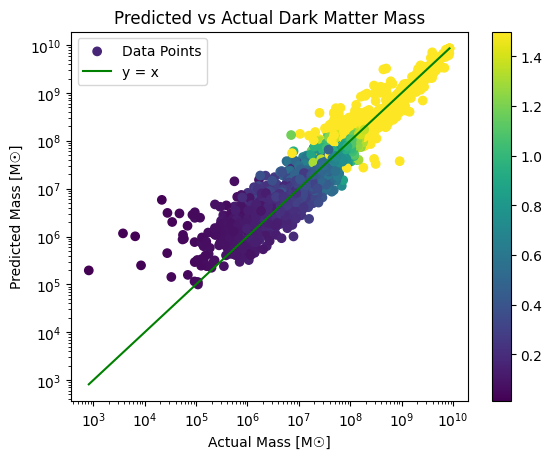

In [1]:
from sklearn.neighbors import KNeighborsRegressor 
from ml import graph, accuracy, split_data, get_saved_data
import joblib

X, Y = get_saved_data()
# Split the data
X_train, X_test, Y_train, Y_test = split_data(X, Y)
# Create the KNN Regressor, train, and then predict
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, Y_train)
Y_pred = knn_regressor.predict(X_test)
# Graph results
print(f"Average Accuracy: {accuracy(Y_test, Y_pred)}%")
print(f"Total Stars: { len(X_test) + len(X_train)}")
print(f"Predicted Stars: { len(Y_pred)}")
graph(Y_test, Y_pred, "Predicted vs Actual Dark Matter Mass", X_test[:,4])
# Save the big boy model
# joblib.dump(knn_regressor, "model_sigma.pkl")



# Only graph halos 1-100 with Model Sigma

Average Accuracy: 48.108%
Total Stars: 4494
Predicted Stars: 4494


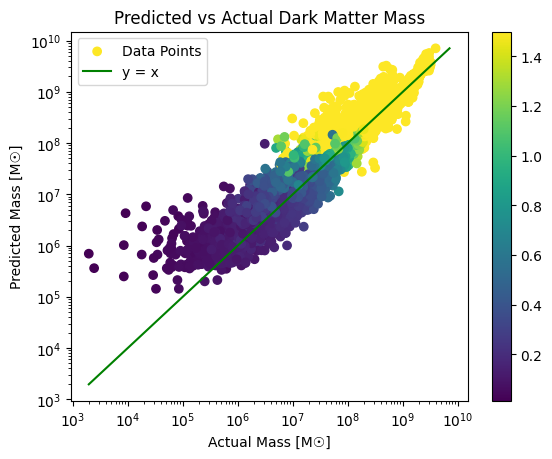

In [10]:
import joblib, numpy as np
from ml import graph, accuracy, split_data, get_saved_data
# Load the data
X_BV = joblib.load('../data/pickle/big_victor/X_BV_1_to_100.pkl')
Y_BV = joblib.load('../data/pickle/big_victor/Y_BV_1_to_100.pkl')
X_LV = joblib.load('../data/pickle/little_victor/X_LV_1_to_100.pkl')
Y_LV = joblib.load('../data/pickle/little_victor/Y_LV_1_to_100.pkl')
X_LR = joblib.load('../data/pickle/little_romeo/X_LR_1_to_100.pkl')
Y_LR = joblib.load('../data/pickle/little_romeo/Y_LR_1_to_100.pkl')
X = np.concatenate([X_BV, X_LV, X_LR], axis=0)
Y = np.concatenate([Y_BV, Y_LV, Y_LR], axis=0)
# Get predictions
knn_regressor = joblib.load("model_sigma.pkl")
Y_pred = np.array(knn_regressor.predict(X))
# Graph results
print(f"Average Accuracy: {accuracy(Y, Y_pred)}%")
print(f"Total Stars: { len(X)}")
print(f"Predicted Stars: { len(Y_pred)}")
graph(Y, Y_pred, "Predicted vs Actual Dark Matter Mass", X[:,4])

# Same thing again, but color coded by whether or not in central halo

Average Accuracy: 73.694%
Average Central Accuracy: 81.614%
Average Non-central Accuracy: 48.108%
Total Stars: 19013
Predicted Stars: 19013
Central Stars:  14519
Non-central Stars:  4494


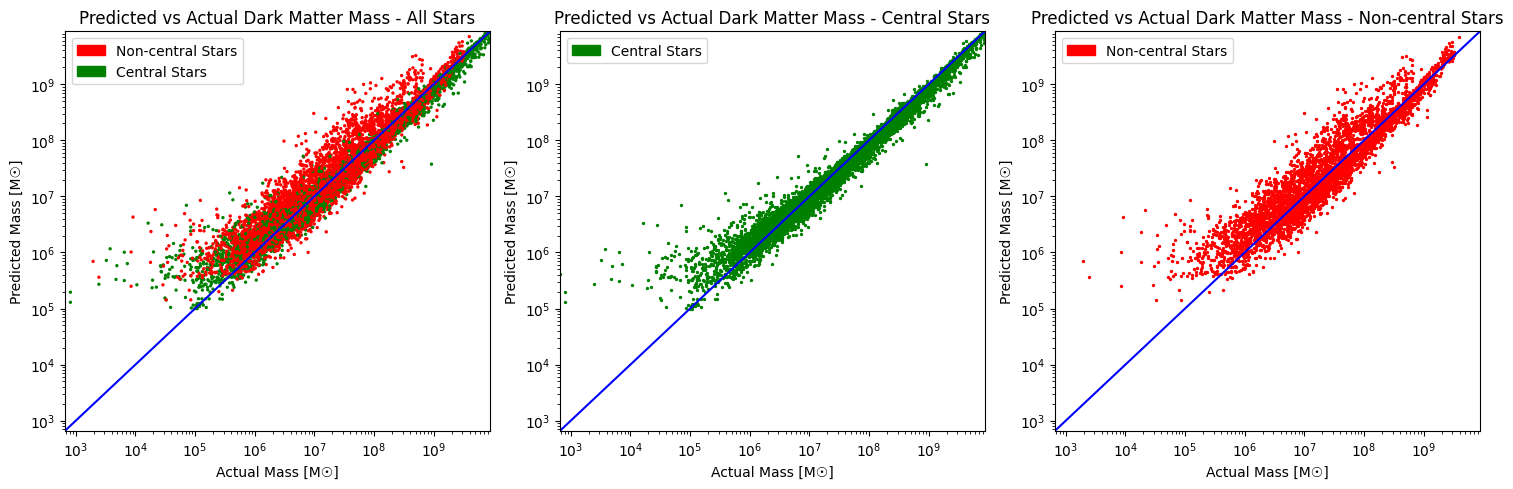

In [8]:
import joblib, numpy as np, matplotlib.pyplot as plt, matplotlib.patches as mpatches
from ml import get_saved_data, accuracy

X_BV = joblib.load('../data/pickle/big_victor/X_BV_1_to_100.pkl')
Y_BV = joblib.load('../data/pickle/big_victor/Y_BV_1_to_100.pkl')
X_LV = joblib.load('../data/pickle/little_victor/X_LV_1_to_100.pkl')
Y_LV = joblib.load('../data/pickle/little_victor/Y_LV_1_to_100.pkl')
X_LR = joblib.load('../data/pickle/little_romeo/X_LR_1_to_100.pkl')
Y_LR = joblib.load('../data/pickle/little_romeo/Y_LR_1_to_100.pkl')
X_1_TO_100 = np.concatenate([X_BV, X_LV, X_LR], axis=0)
Y_1_TO_100 = np.concatenate([Y_BV, Y_LV, Y_LR], axis=0)

X, Y = get_saved_data()
# Load the model and predict
knn_regressor = joblib.load("model_sigma.pkl")
Y_pred = knn_regressor.predict(X)
# Graph results

ranges = [(12494, 'green'), (3518, 'red'), (781, 'green'), (214, 'red'), (1244, 'green'), (762, 'red')]
colors = []
Y_CENTRAL = []
Y_PRED_CENTRAL = []
Y_NON_CENTRAL = []
Y_PRED_NON_CENTRAL = []
index = 0
for range_length, color in ranges:
    for i in range(range_length):
        if color == 'green':
            Y_CENTRAL.append(Y[index])
            Y_PRED_CENTRAL.append(Y_pred[index])
        else:
            Y_NON_CENTRAL.append(Y[index])
            Y_PRED_NON_CENTRAL.append(Y_pred[index])
        colors.append(color)
        index += 1

def graph(title, colors):
    minVal = min(min(Y), min(Y_pred))
    maxVal = max(max(Y), max(Y_pred))

    def subplot(num, mode, title, x, y):
        plt.subplot(1, 3, num)
        c = colors
        if mode == "central": c = "green"
        if mode == "non-central": c = "red"
        plt.scatter(x, y, label='Data Points', c=c, s=2)
        plt.xlim([minVal, maxVal])
        plt.ylim([minVal, maxVal])
        plt.xlabel('Actual Mass [M☉]')
        plt.ylabel('Predicted Mass [M☉]')
        if mode == "all": title += " - All Stars"
        elif mode == "central": title += " - Central Stars"
        elif mode == "non-central": title += " - Non-central Stars"
        plt.title(title)
        plt.loglog()
        # Plot y=x line
        plt.plot([minVal, maxVal], [minVal, maxVal], color='blue', label='y = x')
        # Create custom legend
        if mode == "all":
            green_patch = mpatches.Patch(color='green', label='Central Stars')
            red_patch = mpatches.Patch(color='red', label='Non-central Stars')
            plt.legend(handles=[red_patch, green_patch])
        elif mode == "central":
            green_patch = mpatches.Patch(color='green', label='Central Stars')
            plt.legend(handles=[green_patch])
        elif mode == "non-central":
            red_patch = mpatches.Patch(color='red', label='Non-central Stars')
            plt.legend(handles=[red_patch])
        
    
    plt.figure(figsize=(15, 5))
    subplot(1, "all", title, Y, Y_pred)
    subplot(2, "central", title, Y_CENTRAL, Y_PRED_CENTRAL)
    subplot(3, "non-central", title, Y_NON_CENTRAL, Y_PRED_NON_CENTRAL)
    # Show the plots
    plt.tight_layout()
    plt.show()


print(f"Average Accuracy: {accuracy(Y, Y_pred)}%")
print(f"Average Central Accuracy: {accuracy(Y_CENTRAL, Y_PRED_CENTRAL)}%")
print(f"Average Non-central Accuracy: {accuracy(Y_NON_CENTRAL, Y_PRED_NON_CENTRAL)}%")
print(f"Total Stars: { len(X)}")
print(f"Predicted Stars: { len(Y_pred)}")
print("Central Stars: ", len(Y_CENTRAL))
print("Non-central Stars: ", len(Y_NON_CENTRAL))

graph("Predicted vs Actual Dark Matter Mass", colors)



# Now lets train a model sigma with only non central stars

Average Accuracy: 40.707%
Total Stars: 4494
Predicted Stars: 899


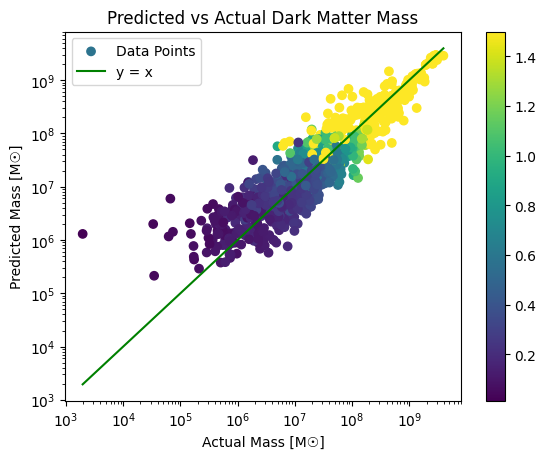

In [6]:
import joblib, numpy as np
from ml import graph, accuracy, split_data, get_saved_data
from sklearn.neighbors import KNeighborsRegressor 

# Load the data
X_BV = joblib.load('../data/pickle/big_victor/X_BV_1_to_100.pkl')
Y_BV = joblib.load('../data/pickle/big_victor/Y_BV_1_to_100.pkl')
X_LV = joblib.load('../data/pickle/little_victor/X_LV_1_to_100.pkl')
Y_LV = joblib.load('../data/pickle/little_victor/Y_LV_1_to_100.pkl')
X_LR = joblib.load('../data/pickle/little_romeo/X_LR_1_to_100.pkl')
Y_LR = joblib.load('../data/pickle/little_romeo/Y_LR_1_to_100.pkl')
X = np.concatenate([X_BV, X_LV, X_LR], axis=0)
Y = np.concatenate([Y_BV, Y_LV, Y_LR], axis=0)
# Split the data
X_train, X_test, Y_train, Y_test = split_data(X, Y)
# Create the KNN Regressor, train, and then predict
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, Y_train)
Y_pred = knn_regressor.predict(X_test)
# Graph results
print(f"Average Accuracy: {accuracy(Y_test, Y_pred)}%")
print(f"Total Stars: { len(X_test) + len(X_train)}")
print(f"Predicted Stars: { len(Y_pred)}")
graph(Y_test, Y_pred, "Predicted vs Actual Dark Matter Mass", X_test[:,4])
# Save the big boy model
# joblib.dump(knn_regressor, "model_sigma.pkl")


# Jeans Equation Stuff

Average Accuracy: 45.583%
Total Stars: 16048
Predicted Stars: 16048


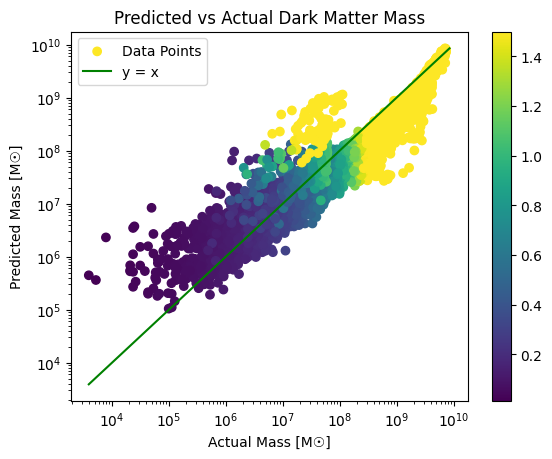

In [1]:
import joblib, numpy as np
from ml import graph, accuracy, split_data, get_saved_data
# Load the data
X = joblib.load('../data/pickle/little_golf/X_LG_0_to_100.pkl')
Y = joblib.load('../data/pickle/little_golf/Y_LG_0_to_100.pkl')
# Get predictions
knn_regressor = joblib.load("model_sigma.pkl")
Y_pred = np.array(knn_regressor.predict(X))
# Graph results
print(f"Average Accuracy: {accuracy(Y, Y_pred)}%")
print(f"Total Stars: { len(X)}")
print(f"Predicted Stars: { len(Y_pred)}")
graph(Y, Y_pred, "Predicted vs Actual Dark Matter Mass", X[:,4])

In [14]:
from stellarutil import Simulation
sim = Simulation("m10q_res250md", species=['star', 'dark'])

sum = 0
for i in range(0, 100):
    num = len(sim.get_halo(i).stars)
    sum += num
    print(f"Stars in Halo {i}: {num}")

print(f"Total Stars: {sum}")

../data/m10q_res250md/snapshot_600.z0.000.AHF_halos

# in gizmo_analysis.gizmo_io.Read():
* reading header from:  data/m10q_res250md/output/snapshot_600.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 15686824 particles
    dark2     (id = 2): 7279624 particles
    gas       (id = 0): 15670448 particles
    star      (id = 4): 16379 particles
    blackhole (id = 5): 0 particles


# in utilities.simulation.Snapshot():
* reading:  data/m10q_res250md/snapshot_times.txt

  using snapshot index = 600, redshift = 0.000


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  data/m10q_res250md/output/snapshot_600.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 15686824 particles
    dark2     (id = 2): 7279624 particles
    gas       (id = 0): 15670448 particles
    star      (id = 4): 16379 particles
    blackhole (id = 5): 0 particles

* reading the following
  species: ['star', 'dark']

* reading particles from: